In [1]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [2]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [4]:
chihuahua_dir = '../input/images/Images/n02085620-Chihuahua'
japanese_spaniel_dir = '../input/images/Images/n02085782-Japanese_spaniel'
maltese_dir = '../input/images/Images/n02085936-Maltese_dog'
pekinese_dir = '../input/images/Images/n02086079-Pekinese'
shitzu_dir = '../input/images/Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = '../input/images/Images/n02086646-Blenheim_spaniel'
papillon_dir = '../input/images/Images/n02086910-papillon'
toy_terrier_dir = '../input/images/Images/n02087046-toy_terrier'
afghan_hound_dir = '../input/images/Images/n02088094-Afghan_hound'
basset_dir = '../input/images/Images/n02088238-basset'


X = []
Z = []
imgsize = 150

In [5]:
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

100%|██████████| 175/175 [00:00<00:00, 223.50it/s]


In [6]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [7]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

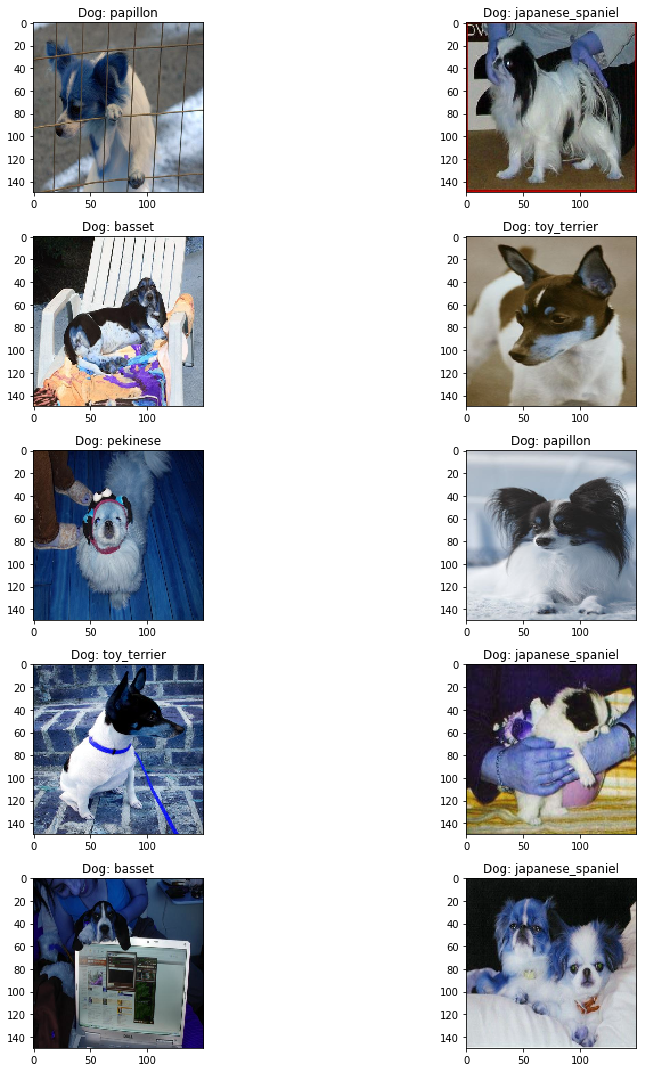

In [8]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [9]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

58892288/58889256 [==============================] - 2s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fc70422f320> False
<keras.layers.convolutional.Conv2D object at 0x7fc70422f710> False
<keras.layers.convolutional.Conv2D object at 0x7fc70422f828> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc704295128> False
<keras.layers.convolutional.Conv2D object at 0x7fc704295ac8> False
<keras.layers.convolutional.Conv2D object at 0x7fc7041c81d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc7041633c8> False
<keras.layers.convolutional.Conv2D object at 0x7fc704163da0> False
<keras.layers.convolutional.Conv2D object at 0x7fc704191240> False
<keras.layers.convolutional.Conv2D object at 0x7fc70412a5f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc704146470> False
<keras.layers.convolutional.Conv2D object at 0x7fc704146f98> False
<keras.layers.convolutional.Conv2D object at 0x7fc7040f5400> False
<keras.layers.convolutional.Conv2D object at 0x7fc7041112b0> F

In [10]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [11]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#-----------Training------------#
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=16),
    validation_data  = (x_test,y_test),
    validation_steps = 1000,
    steps_per_epoch  = 1000,
    epochs = 20, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/20
1000/1000 [==============================] - 122s 122ms/step - loss: 1.8237 - acc: 0.3849 - val_loss: 1.3695 - val_acc: 0.5633

Epoch 00001: val_loss improved from inf to 1.36950, saving model to ./base.model
Epoch 2/20
1000/1000 [==============================] - 118s 118ms/step - loss: 1.4211 - acc: 0.5310 - val_loss: 1.2250 - val_acc: 0.5841

Epoch 00002: val_loss improved from 1.36950 to 1.22503, saving model to ./base.model
Epoch 3/20
1000/1000 [==============================] - 118s 118ms/step - loss: 1.3076 - acc: 0.5646 - val_loss: 1.1364 - val_acc: 0.6170

Epoch 00003: val_loss improved from 1.22503 to 1.13640, saving model to ./base.model
Epoch 4/20
1000/1000 [==============================] - 120s 120ms/step - loss: 1.2528 - acc: 0.5791 - val_loss: 1.0999 - val_acc: 0.6308

Epoch 00004: val_loss improved from 1.13640 to 1.09987, saving model to ./base.model
Epoch 5/20
1000/1000 [==============================] - 121s 121ms/step - loss: 1.2124 - acc: 0.5882 - val_l

577/577 [==============================] - 5s 8ms/step
Model Test Loss: 1.00163853382837
Model Test Accuracy: 0.6637781629116117
Weights Saved


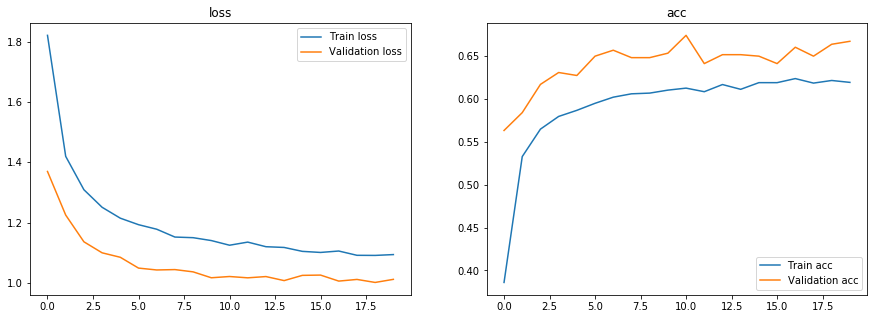

In [12]:
show_final_history(history)
model.load_weights('./base.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

In [13]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 8080 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-02-19 14:09:21--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.54.84.112, 52.45.248.161, 54.174.228.92, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.54.84.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  9.65MB/s    in 0.5s    

2019-02-19 14:09:22 (9.65 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://9510ae10.ngrok.io
